<IPython.core.display.Javascript object>


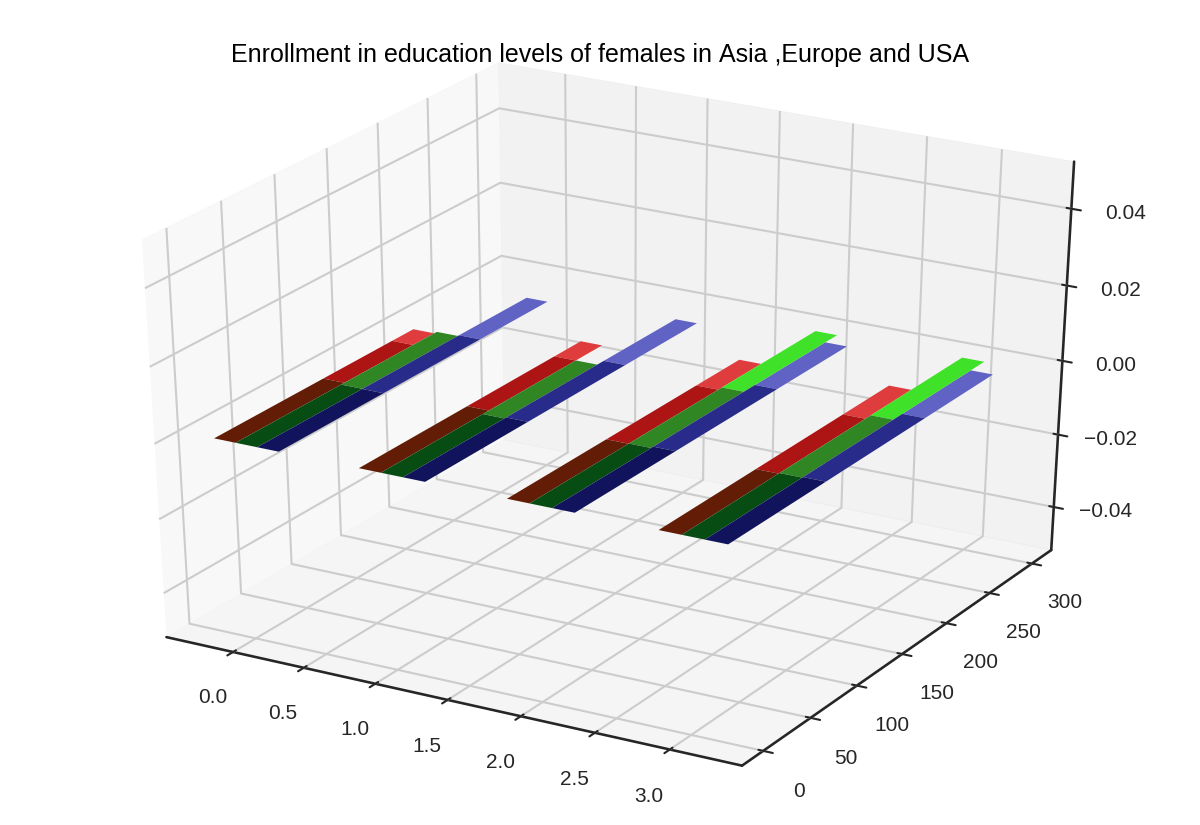

<IPython.core.display.Javascript object>


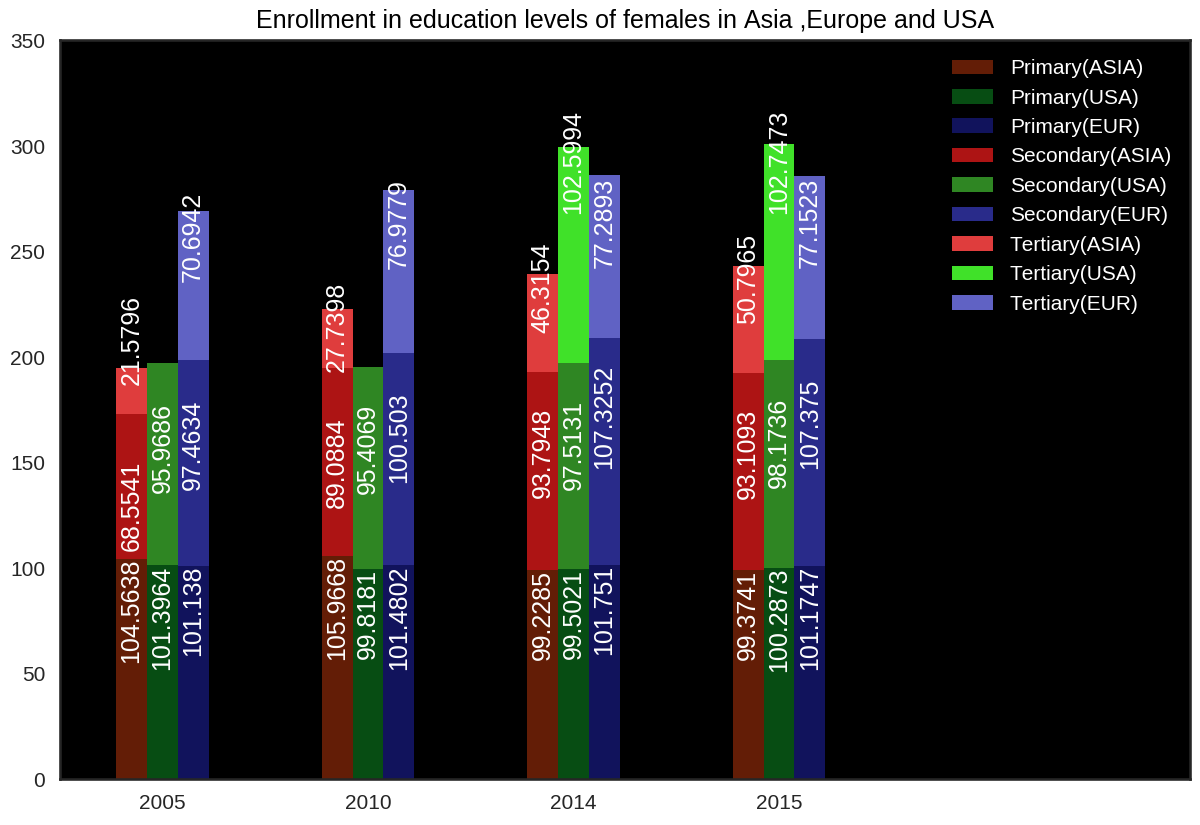

In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import matplotlib.animation as animation

df=pd.read_csv('SYB62_309_201906_Education.csv',skiprows=1)
curr=1
df=df.sort_values(by='Unnamed: 1',ascending=True).rename(columns={'Unnamed: 1':'Country', 'Region/Country/Area':'Region'}).drop(['Region','Footnotes','Source'],axis=1)
 
years= [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

df= df[df.Year.isin(years)]

Educationratio= ['Gross enrollment ratio - Secondary (female)','Gross enrollment ratio - Primary (female)','Gross enrollment ratio - Tertiary (female)']
df= df[df.Series.isin(Educationratio)]
Countries=[ 'Eastern Asia','Europe','United States of America']
df=df[df.Country.isin(Countries)]
s= df.groupby(['Country']).apply(lambda a : a.drop(['Country'],axis=1)[:]).reset_index().drop('level_1',axis=1,errors='coerce')    
s = s.groupby(['Series']).apply(lambda a : a.drop(['Series'],axis=1)[:]).reset_index().drop('level_1',axis=1,errors='coerce')#.set_index(['Series','Year'])

f=s.pivot_table(values='Value', index=['Year'], columns=['Series','Country'], aggfunc='first')

Primary= f['Gross enrollment ratio - Primary (female)'].fillna(0)
Secondary = f['Gross enrollment ratio - Secondary (female)'].fillna(0)
Tertiary= f['Gross enrollment ratio - Tertiary (female)'].fillna(0)

years1 = np.arange(4)

fig= plt.figure()
ax=plt.gca()
plt.style.use('seaborn-colorblind')
ax.set_facecolor('xkcd:black')
sns.set_style('white')
def abc():
    plt.xlim((-0.5,5))
    plt.title('Enrollment in education levels of females in Asia ,Europe and USA',color='black')
    ax.set_xticklabels(['','2005','2010','2014','2015'])
    plt.ylim((0,350))
abc()

def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.01),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='top',rotation=90,color='white')

def curr1():
    fig=plt.gcf()
    abc()
    x=plt.bar(years1-0.15,Primary['Eastern Asia'].astype(float),width=0.15, color='#631D06',label='Primary(ASIA)')
    
    autolabel(x)

    i=plt.legend(loc='best')
    for text in i.get_texts():
        text.set_color("white")

def curr2():
    fig=plt.gcf()
    plt.cla()
    abc()
    x=plt.bar(years1-0.15,Primary['Eastern Asia'].astype(float),width=0.15, color='black',label='Primary(ASIA)',edgecolor='white')
    #y=plt.bar(years1,Primary['United States of America'].astype(float),width=0.15, color='#074D13',label='Primary(USA)')
    a=plt.bar(years1-0.15, Secondary['Eastern Asia'].astype(float), width=0.15,bottom=Primary['Eastern Asia'].astype(float), color='#AD1414',label='Secondary(ASIA)',edgecolor='black')
    autolab(a)

    i=plt.legend(loc='best')
    for text in i.get_texts():
        text.set_color("white")
        
def curr3():
    fig=plt.gcf()
    plt.cla()
    abc()
    x=plt.bar(years1-0.15,Primary['Eastern Asia'].astype(float),width=0.15, color='black',label='Primary(ASIA)',edgecolor='white')
    a=plt.bar(years1-0.15, Secondary['Eastern Asia'].astype(float), width=0.15,bottom=Primary['Eastern Asia'].astype(float), color='black',label='Secondary(ASIA)',edgecolor='white')
    l=plt.bar(years1-0.15, Tertiary['Eastern Asia'].astype(float), width=0.15,bottom=Secondary['Eastern Asia'].astype(float)+Primary['Eastern Asia'].astype(float), color='#DF3D3D',label='Tertiary(ASIA)')
    auto(l)
    i=plt.legend(loc='best')
    for text in i.get_texts():
        text.set_color("white")

def autolab(rects1):
        for rect in rects1:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,40.2), 
                    textcoords="offset points",
                    ha='center', va='bottom',rotation=90,color='white')
def curr4():
    fig=plt.gcf()
    plt.cla()
    abc()
    x=plt.bar(years1-0.15,Primary['Eastern Asia'].astype(float),width=0.15, color='black',label='Primary(ASIA)',edgecolor='white')
    a=plt.bar(years1-0.15, Secondary['Eastern Asia'].astype(float), width=0.15,bottom=Primary['Eastern Asia'].astype(float), color='black',label='Secondary(ASIA)',edgecolor='white')
    l=plt.bar(years1-0.15, Tertiary['Eastern Asia'].astype(float), width=0.15,bottom=Secondary['Eastern Asia'].astype(float)+Primary['Eastern Asia'].astype(float), color='black',label='Tertiary(ASIA)',edgecolor='white')
    y=plt.bar(years1,Primary['United States of America'].astype(float),width=0.15, color='#074D13',label='Primary(USA)')
    autolabel(y)


    i=plt.legend(loc='best')
    for text in i.get_texts():
        text.set_color("white")
        
def curr5():
    fig=plt.gcf()
    plt.cla()
    abc()
    x=plt.bar(years1-0.15,Primary['Eastern Asia'].astype(float),width=0.15, color='black',label='Primary(ASIA)',edgecolor='white')
    y=plt.bar(years1,Primary['United States of America'].astype(float),width=0.15, color='black',label='Primary(USA)',edgecolor='white')
    b=plt.bar(years1, Secondary['United States of America'].astype(float), width=0.15,bottom=Primary['United States of America'].astype(float), color='#2F8623',label='Secondary(USA)')
    a=plt.bar(years1-0.15, Secondary['Eastern Asia'].astype(float), width=0.15,bottom=Primary['Eastern Asia'].astype(float), color='black',label='Secondary(ASIA)',edgecolor='white')
    l=plt.bar(years1-0.15, Tertiary['Eastern Asia'].astype(float), width=0.15,bottom=Secondary['Eastern Asia'].astype(float)+Primary['Eastern Asia'].astype(float), color='black',label='Tertiary(ASIA)',edgecolor='white')

    autolab(b)
    i=plt.legend(loc='best')
    for text in i.get_texts():
        text.set_color("white")
        
def curr6():
    fig=plt.gcf()
    plt.cla()
    abc()
    x=plt.bar(years1-0.15,Primary['Eastern Asia'].astype(float),width=0.15, color='black',label='Primary(ASIA)',edgecolor='white')
    y=plt.bar(years1,Primary['United States of America'].astype(float),width=0.15, color='black',label='Primary(USA)',edgecolor='white')
    b=plt.bar(years1, Secondary['United States of America'].astype(float), width=0.15,bottom=Primary['United States of America'].astype(float), color='black',label='Secondary(USA)',edgecolor='white')
    a=plt.bar(years1-0.15, Secondary['Eastern Asia'].astype(float), width=0.15,bottom=Primary['Eastern Asia'].astype(float), color='black',label='Secondary(ASIA)',edgecolor='white')
    l=plt.bar(years1-0.15, Tertiary['Eastern Asia'].astype(float), width=0.15,bottom=Secondary['Eastern Asia'].astype(float)+Primary['Eastern Asia'].astype(float), color='black',label='Tertiary(ASIA)',edgecolor='white')
    m=plt.bar(years1, Tertiary['United States of America'].astype(float), width=0.15,bottom=Secondary['United States of America'].astype(float)+Primary['United States of America'].astype(float), color='#40E129',label='Tertiary(USA)')
    auto(m)
    i=plt.legend(loc='best')
    for text in i.get_texts():
        text.set_color("white")
        
def auto(rects1):
        for rect in rects1:
            height = rect.get_height()
            if height!=0:
                ax.annotate('{}'.format(height),
                         xy=(rect.get_x() + rect.get_width() / 2, height+165),
                          xytext=(0,0.01), 
                         textcoords="offset points",
                         ha='center', va='bottom',rotation=90,color="white")        
def curr7():
    fig=plt.gcf()
    plt.cla()
    abc()
    x=plt.bar(years1-0.15,Primary['Eastern Asia'].astype(float),width=0.15, color='black',label='Primary(ASIA)',edgecolor='white')
    y=plt.bar(years1,Primary['United States of America'].astype(float),width=0.15, color='black',label='Primary(USA)',edgecolor='white')
    b=plt.bar(years1, Secondary['United States of America'].astype(float), width=0.15,bottom=Primary['United States of America'].astype(float), color='black',label='Secondary(USA)',edgecolor='white')
    a=plt.bar(years1-0.15, Secondary['Eastern Asia'].astype(float), width=0.15,bottom=Primary['Eastern Asia'].astype(float), color='black',label='Secondary(ASIA)',edgecolor='white')
    l=plt.bar(years1-0.15, Tertiary['Eastern Asia'].astype(float), width=0.15,bottom=Secondary['Eastern Asia'].astype(float)+Primary['Eastern Asia'].astype(float), color='black',label='Tertiary(ASIA)',edgecolor='white')
    m=plt.bar(years1, Tertiary['United States of America'].astype(float), width=0.15,bottom=Secondary['United States of America'].astype(float)+Primary['United States of America'].astype(float), color='black',label='Tertiary(USA)',edgecolor='white')
    
    z=plt.bar(years1+0.15,Primary['Europe'].astype(float),width=0.15, color='#11135C',label='Primary(EUR)')
    autolabel(z)   

    i=plt.legend(loc='best')
    for text in i.get_texts():
        text.set_color("white")
        
def curr8():
    fig=plt.gcf()
    plt.cla()
    abc()
    x=plt.bar(years1-0.15,Primary['Eastern Asia'].astype(float),width=0.15, color='black',label='Primary(ASIA)',edgecolor='white')
    y=plt.bar(years1,Primary['United States of America'].astype(float),width=0.15, color='black',label='Primary(USA)',edgecolor='white')
    b=plt.bar(years1, Secondary['United States of America'].astype(float), width=0.15,bottom=Primary['United States of America'].astype(float), color='black',label='Secondary(USA)',edgecolor='white')
    a=plt.bar(years1-0.15, Secondary['Eastern Asia'].astype(float), width=0.15,bottom=Primary['Eastern Asia'].astype(float), color='black',label='Secondary(ASIA)',edgecolor='white')
    l=plt.bar(years1-0.15, Tertiary['Eastern Asia'].astype(float), width=0.15,bottom=Secondary['Eastern Asia'].astype(float)+Primary['Eastern Asia'].astype(float), color='black',label='Tertiary(ASIA)',edgecolor='white')
    m=plt.bar(years1, Tertiary['United States of America'].astype(float), width=0.15,bottom=Secondary['United States of America'].astype(float)+Primary['United States of America'].astype(float), color='black',label='Tertiary(USA)',edgecolor='white')
    
    z=plt.bar(years1+0.15,Primary['Europe'].astype(float),width=0.15, color='black',label='Primary(EUR)',edgecolor='white')
    c=plt.bar(years1+0.15, Secondary['Europe'].astype(float), width=0.15,bottom=Primary['Europe'].astype(float), color='#292B8A',label='Secondary(EUR)')
    autolab(c) 

    i=plt.legend(loc='best')
    for text in i.get_texts():
        text.set_color("white")

def curr9():
    fig=plt.gcf()
    plt.cla()
    abc()
    x=plt.bar(years1-0.15,Primary['Eastern Asia'].astype(float),width=0.15, color='black',label='Primary(ASIA)',edgecolor='white')
    y=plt.bar(years1,Primary['United States of America'].astype(float),width=0.15, color='black',label='Primary(USA)',edgecolor='white')
    z=plt.bar(years1+0.15,Primary['Europe'].astype(float),width=0.15, color='black',label='Primary(EUR)',edgecolor='white')
    a=plt.bar(years1-0.15, Secondary['Eastern Asia'].astype(float), width=0.15,bottom=Primary['Eastern Asia'].astype(float), color='black',label='Secondary(ASIA)',edgecolor='white')
    b=plt.bar(years1, Secondary['United States of America'].astype(float), width=0.15,bottom=Primary['United States of America'].astype(float), color='black',label='Secondary(USA)',edgecolor='white')
    c=plt.bar(years1+0.15, Secondary['Europe'].astype(float), width=0.15,bottom=Primary['Europe'].astype(float), color='black',label='Secondary(EUR)',edgecolor='white')
    l=plt.bar(years1-0.15, Tertiary['Eastern Asia'].astype(float), width=0.15,bottom=Secondary['Eastern Asia'].astype(float)+Primary['Eastern Asia'].astype(float), color='black',label='Tertiary(ASIA)',edgecolor='white')
    m=plt.bar(years1, Tertiary['United States of America'].astype(float), width=0.15,bottom=Secondary['United States of America'].astype(float)+Primary['United States of America'].astype(float), color='black',label='Tertiary(USA)',edgecolor='white')
    p=plt.bar(years1+ .15, Tertiary['Europe'].astype(float), width=0.15,bottom=Secondary['Europe'].astype(float)+Primary['Europe'].astype(float), color='#6062C4',label='Tertiary(EUR)')
        
    auto(p)
    i=plt.legend(loc='best')
    for text in i.get_texts():
        text.set_color("white")
    
def curr10():
    fig=plt.gcf()
    plt.cla()
    abc()
    x=plt.bar(years1-0.15,Primary['Eastern Asia'].astype(float),width=0.15, color='#631D06',label='Primary(ASIA)')
    y=plt.bar(years1,Primary['United States of America'].astype(float),width=0.15, color='#074D13',label='Primary(USA)')
    z=plt.bar(years1+0.15,Primary['Europe'].astype(float),width=0.15, color='#11135C',label='Primary(EUR)')
    a=plt.bar(years1-0.15, Secondary['Eastern Asia'].astype(float), width=0.15,bottom=Primary['Eastern Asia'].astype(float), color='#AD1414',label='Secondary(ASIA)')
    b=plt.bar(years1, Secondary['United States of America'].astype(float), width=0.15,bottom=Primary['United States of America'].astype(float), color='#2F8623',label='Secondary(USA)')
    c=plt.bar(years1+0.15, Secondary['Europe'].astype(float), width=0.15,bottom=Primary['Europe'].astype(float), color='#292B8A',label='Secondary(EUR)')
    l=plt.bar(years1-0.15, Tertiary['Eastern Asia'].astype(float), width=0.15,bottom=Secondary['Eastern Asia'].astype(float)+Primary['Eastern Asia'].astype(float), color='#DF3D3D',label='Tertiary(ASIA)')
    m=plt.bar(years1, Tertiary['United States of America'].astype(float), width=0.15,bottom=Secondary['United States of America'].astype(float)+Primary['United States of America'].astype(float), color='#40E129',label='Tertiary(USA)')
    p=plt.bar(years1+ .15, Tertiary['Europe'].astype(float), width=0.15,bottom=Secondary['Europe'].astype(float)+Primary['Europe'].astype(float), color='#6062C4',label='Tertiary(EUR)')
    autolabel(x)
    autolabel(y)

    autolabel(z)
    autolab(a)
    autolab(b)
    autolab(c)    
    auto(l)   
    auto(m) 
    auto(p)
    i=plt.legend(loc='best')
    for text in i.get_texts():
        text.set_color("white")

def update(curr):
    if curr == 1:
        curr1()
    if curr == 2:
        curr2()
    if curr==3:
        curr3()
    if curr == 4:
        curr4()
    if curr == 5:
        curr5()
    if curr==6:
        curr6()
    if curr == 7:
        curr7()
    if curr == 8:
        curr8()
    if curr==9:
        curr9()
    if curr==10:
        curr10()
        a.event_source.stop()
  
a = animation.FuncAnimation(fig, update, interval=1000)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)